In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
dark_horse=cv2.imread('horse.jpg')#this is in the bgr format
show_horse=cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB)#this is in the rgb format

rainbow=cv2.imread('rainbow.jpg')
show_rainbow=cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks=cv2.imread('C:/6-computer_vision/bricks.jpg')
show_bricks=cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

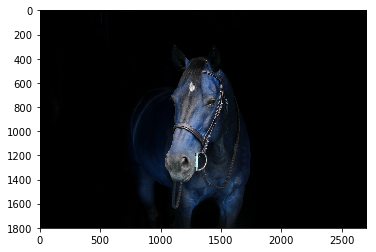

In [26]:
plt.imshow(dark_horse)


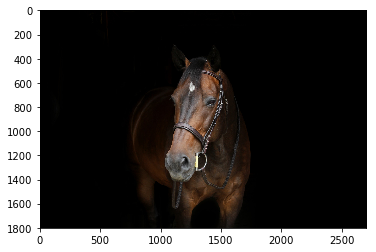

In [27]:
plt.imshow(show_horse)

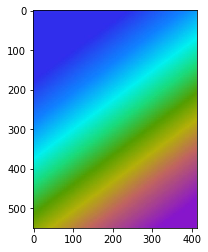

In [23]:
plt.imshow(rainbow)

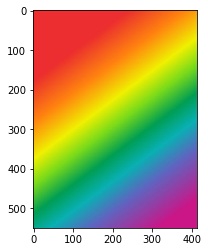

In [22]:
plt.imshow(show_rainbow)

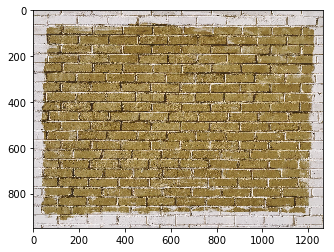

In [24]:
plt.imshow(blue_bricks)

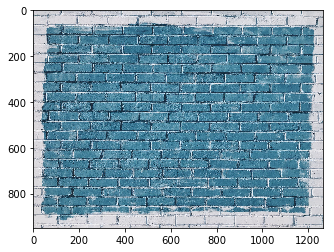

In [25]:
plt.imshow(show_bricks)

In [31]:
hist_values=cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [33]:
hist_values.shape#256 hist size and 1:one channel

(256, 1)

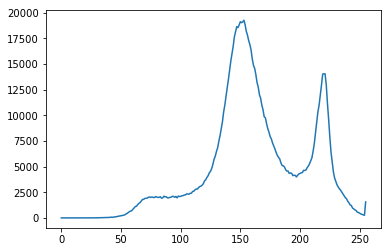

In [36]:
#let us visualize the contribution of blue channel
plt.plot(hist_values)

In [42]:
hist_values=cv2.calcHist([blue_bricks],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hist_values.shape

(256, 1)

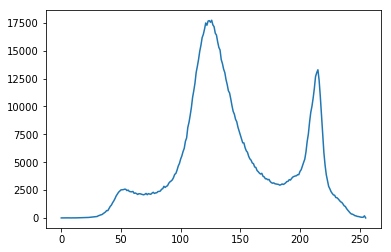

In [41]:
plt.plot(hist_values)#contribution of green channel

In [44]:
hist_values=cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_values.shape

(256, 1)

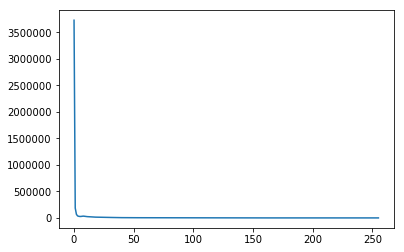

In [46]:
plt.plot(hist_values)#contribution of blue channel

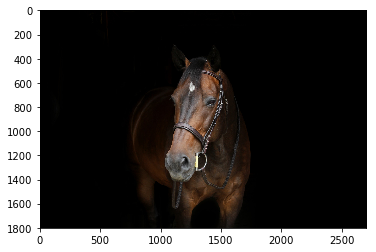

In [51]:
plt.imshow(show_horse)

In [48]:
hist_values=cv2.calcHist([dark_horse],channels=[2],mask=None,histSize=[256],ranges=[0,256])
hist_values.shape

(256, 1)

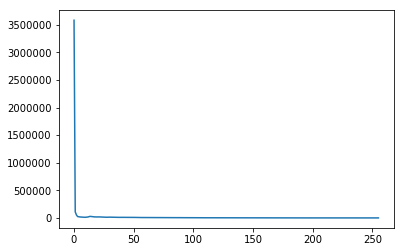

In [50]:
plt.plot(hist_values)#contribution of red channel in that horse image

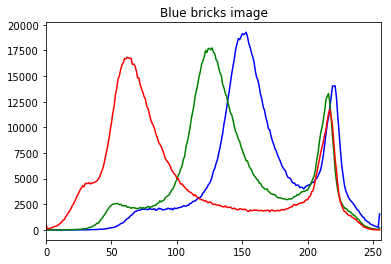

In [62]:
#to check the contribution of each channel blue,green,red in the blue_bricks
img=blue_bricks
color=('b','g','r')
for i,col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title('Blue bricks image')
plt.show()   
    

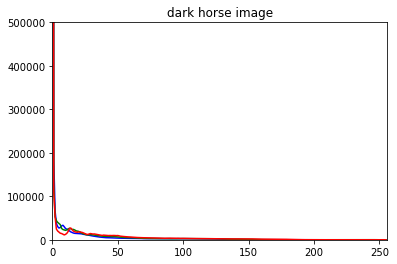

In [59]:
img=dark_horse
color=('b','g','r')
for i,col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    plt.ylim(0,500000)#here ylim was around 350000 something so we gave it according to ourself
plt.title('dark horse image')
plt.show()   
    

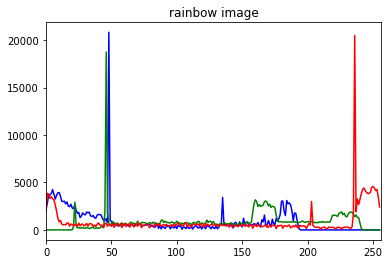

In [60]:
img=rainbow
color=('b','g','r')
for i,col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title('rainbow image')
plt.show()   
    

In [63]:
#masking:for object detection we are going to use masking and also histogram

In [65]:
#we can mask only certain parts of the imAGe

In [66]:
img=rainbow

In [67]:
img.shape

(550, 413, 3)

In [69]:
#we want only(550,413) then you can write img.shape[:2]

In [70]:
#create a mask

In [71]:
mask=np.zeros(img.shape[:2],np.uint8)
mask[300:400,100:400]=255

In [79]:
print(mask.dtype)#check mask datatype
mask=mask.astype('uint8')#convert mask to uint8 if necessary

uint8


In [73]:
show_rainbow_resized=cv2.resize(show_rainbow,(mask.shape[1],mask.shape[0]))

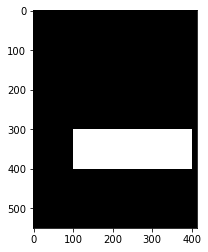

In [74]:
plt.imshow(mask,cmap='gray')

In [76]:
masked_img=cv2.bitwise_and(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_rainbow_resized,show_rainbow_resized,mask=mask)

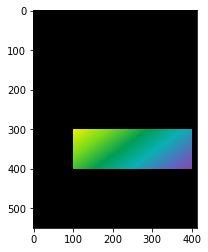

In [78]:
plt.imshow(show_masked_img)

In [80]:
#once the mask is properly formatted ,you can safely compute the histogram
#for executing this for rainbow 

In [84]:
hist_mask_values_red=cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_values.shape
hist_full_values_red=cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5,1,'histogram for red values of the full image')

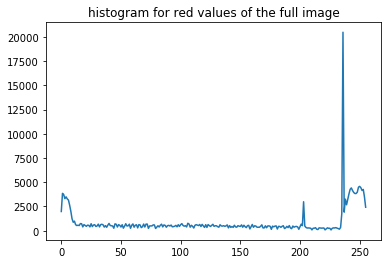

In [86]:
plt.plot(hist_full_values_red)
plt.title('histogram for red values of the full image')

Text(0.5,1,'histogram for red values of the masked image')

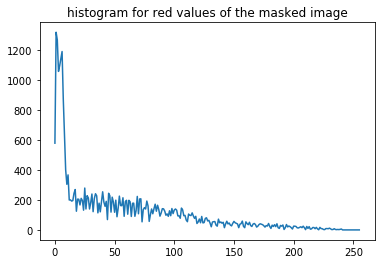

In [88]:
plt.plot(hist_mask_values_red)
plt.title('histogram for red values of the masked image')

histogram equalization
https://wikipwdia.org/wiki/Histogram_equalization....search this on wikipedia

In [4]:
gorilla=cv2.imread('C:/6-computer_vision/gorilla.jpg',0)
"""here's a brief overview of the different options for this argument:

0:read the image in grayscale
1:read the image in color mode (default),resulting in a 3-channel image resullting in  a 4-channel image

in your case using 0 will load gorilla.jpg as a grayscale"""

"here's a brief overview of the different options for this argument:\n\n0:read the image in grayscale\n1:read the image in color mode (default),resulting in a 3-channel image resullting in  a 4-channel image\n\nin your case using 0 will load gorilla.jpg as a grayscale"

In [7]:
def display(img,cmap=None):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)
    
#due to this we will get gray color

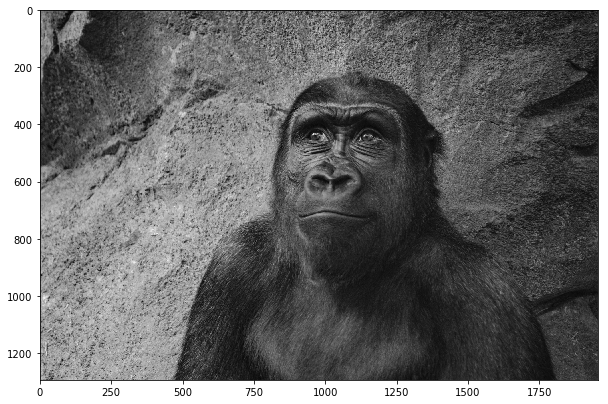

In [6]:
display(gorilla,cmap='gray')

In [10]:
hist_values=cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
'''[gorilla]:
this is a image (or list of image) for which you want to calculate the channels=[0]

this specifies the index of teh channel you want to compute
the histogram for.since the image is grayscale ,it has only one channel,which is indexed as 0.
for color images,you could specify [0] for the blue channel ,[1] for the green channel ,and [2] for red channel.\


'''

'[gorilla]:\nthis is a image (or list of image) for which you want to calculate the channels=[0]\n\nthis specifies the index of teh channel you want to compute\nthe histogram for.since the image is grayscale ,it has only one channel,which is indexed as 0.\nfor color images,you could specify [0] for the blue channel ,[1] for the green channel ,and [2] for red channel.\n\n'

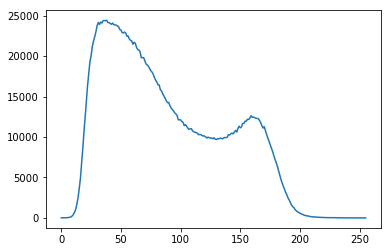

In [11]:
plt.plot(hist_values)

In [12]:
eq_gorilla=cv2.equalizeHist(gorilla)

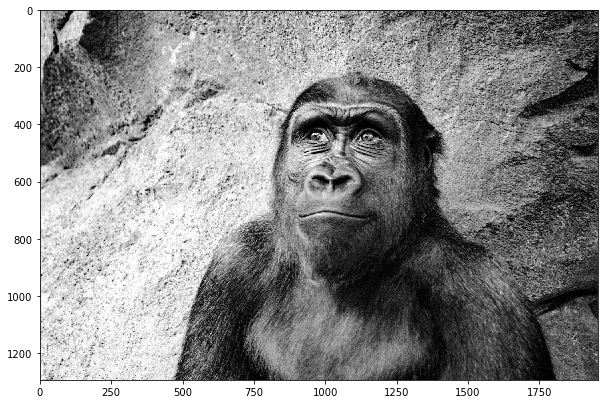

In [13]:
display(eq_gorilla,cmap='gray')

In [14]:
hist_values=cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])


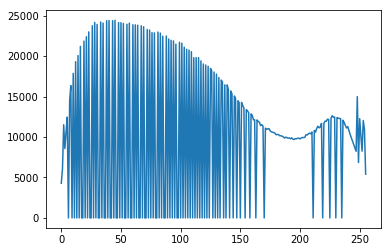

In [15]:
plt.plot(hist_values)

In [20]:
color_gorilla=cv2.imread('C:/6-computer_vision/gorilla.jpg')
show_gorilla=cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
#convert to HSV colorspace
hsv=cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

#whenever we apply equalization for color image it is compulsory to convert it into hsv

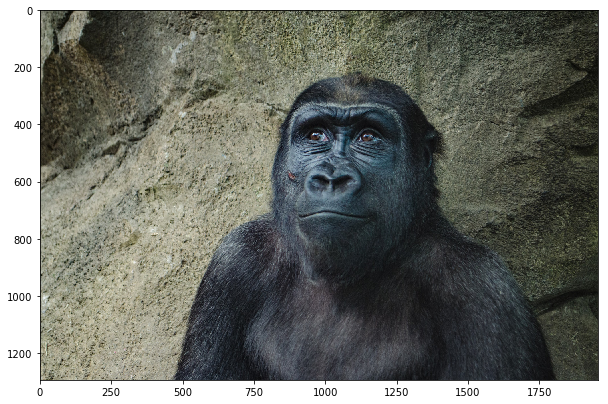

In [18]:
display(show_gorilla)

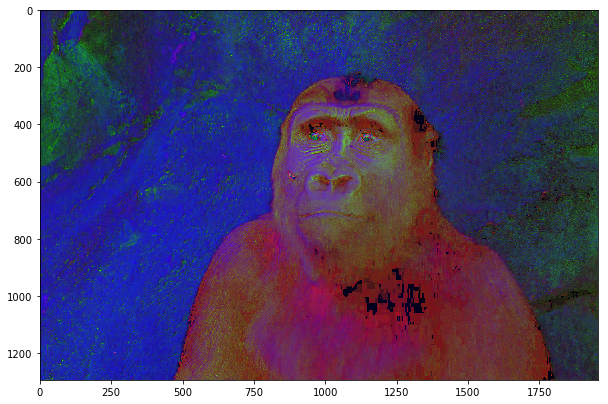

In [19]:
display(hsv)

In [22]:
#grab v channel
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

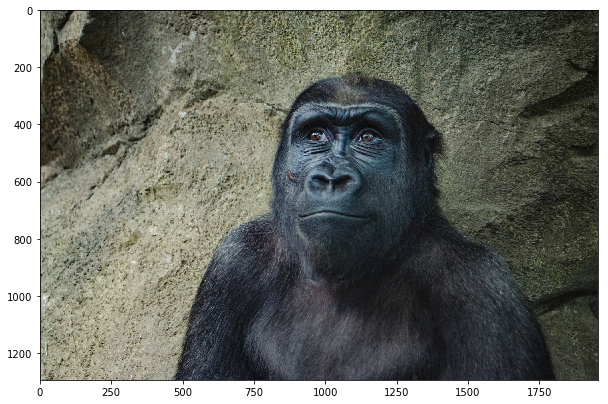

In [23]:
#convert back to RGB to visualize
eq_color_gorilla=cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)

In [24]:
hist_values=cv2.calcHist([eq_color_gorilla],channels=[1],mask=None,histSize=[256],ranges=[0,256])


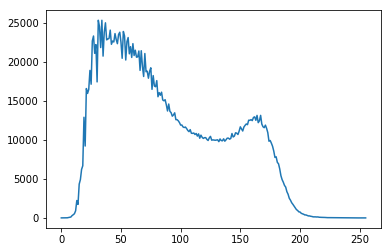

In [27]:
plt.plot(hist_values)

OpenCV connecting to a USB camera or a laptop camera

https://github.com/opencv/opencv/issues/8471